# Vaccination Prediction
## PRCP-1014-VaccinePred
#### The goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. In specific, the target is to predict two probabilities: one for h1n1_vaccine and one for seasonal_vaccine. It is a multi-label classification problem.

## Installing the required packages

In [1]:
!pip install scikit-multilearn

## Importing the required libraries

In [2]:
# Common libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Feature Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA

# Libraries for Problem Transformation

from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

# Libraries for model training

from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score

# Libraries for algorithm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Libraries for testing

from sklearn.metrics import accuracy_score , classification_report

# Removing warnings

import warnings
warnings.filterwarnings('ignore')

# Storing plots

%matplotlib inline

## Loading the dataset into the dataframe

In [3]:
features = pd.read_csv("features copy.csv")
labels = pd.read_csv("labels copy.csv")

In [4]:
features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


## Checking the shape of dataset

In [6]:
features.shape

(53414, 36)

#### There are 36 features so either we should do PCA or feature selection.

In [7]:
labels.shape

(53414, 3)

## Checking the data types

In [8]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53414 entries, 0 to 53413
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53414 non-null  int64  
 1   h1n1_concern                 53230 non-null  float64
 2   h1n1_knowledge               53182 non-null  float64
 3   behavioral_antiviral_meds    53272 non-null  float64
 4   behavioral_avoidance         52998 non-null  float64
 5   behavioral_face_mask         53376 non-null  float64
 6   behavioral_wash_hands        53330 non-null  float64
 7   behavioral_large_gatherings  53240 non-null  float64
 8   behavioral_outside_home      53250 non-null  float64
 9   behavioral_touch_face        53158 non-null  float64
 10  doctor_recc_h1n1             49094 non-null  float64
 11  doctor_recc_seasonal         49094 non-null  float64
 12  chronic_med_condition        51472 non-null  float64
 13  child_under_6_mo

#### We need to encode the object to int

In [9]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53414 entries, 0 to 53413
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     53414 non-null  int64
 1   h1n1_vaccine      53414 non-null  int64
 2   seasonal_vaccine  53414 non-null  int64
dtypes: int64(3)
memory usage: 1.2 MB


# DATA PRE-PROCESSING

# Checking for duplicates in dataset

In [10]:
features.duplicated().sum()

26707

#### There no duplicates in dataset.

In [11]:
labels.duplicated().sum()

26707

## Checking for missing values in dataset

In [12]:
features.isnull().sum()

respondent_id                      0
h1n1_concern                     184
h1n1_knowledge                   232
behavioral_antiviral_meds        142
behavioral_avoidance             416
behavioral_face_mask              38
behavioral_wash_hands             84
behavioral_large_gatherings      174
behavioral_outside_home          164
behavioral_touch_face            256
doctor_recc_h1n1                4320
doctor_recc_seasonal            4320
chronic_med_condition           1942
child_under_6_months            1640
health_worker                   1608
health_insurance               24548
opinion_h1n1_vacc_effective      782
opinion_h1n1_risk                776
opinion_h1n1_sick_from_vacc      790
opinion_seas_vacc_effective      924
opinion_seas_risk               1028
opinion_seas_sick_from_vacc     1074
age_group                          0
education                       2814
race                               0
sex                                0
income_poverty                  8846
m

#### There are lots of missing value so we need to impute them.

In [13]:
labels.isnull().sum()

respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

## Filling the missing values

In [14]:
# For float fill missing values with the mean

features = features.fillna(features.mean())
features = round(features)

# For string fill missing value with 'No Category'

features = features.fillna('No Category')

In [15]:
features.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

## Finding the unique values of features

In [16]:
# For Datatype = float

print("h1n1_concern")
print(features.h1n1_concern.unique())

print("h1n1_knowledge")
print(features.h1n1_knowledge.unique())

print("behavioral_antiviral_meds")
print(features.behavioral_antiviral_meds.unique())

print("behavioral_avoidance")
print(features.behavioral_avoidance.unique())

print("behavioral_face_mask")
print(features.behavioral_face_mask.unique())

print("behavioral_wash_hands")
print(features.behavioral_wash_hands.unique())

print("behavioral_large_gatherings")
print(features.behavioral_large_gatherings.unique())

print("behavioral_outside_home")
print(features.behavioral_outside_home.unique())

print("behavioral_touch_face")
print(features.behavioral_touch_face.unique())

print("doctor_recc_h1n1")
print(features.doctor_recc_h1n1.unique())

print("doctor_recc_seasonal")
print(features.doctor_recc_seasonal.unique())

print("chronic_med_condition")
print(features.chronic_med_condition.unique())

print("child_under_6_months")
print(features.child_under_6_months.unique())

print("health_worker")
print(features.health_worker.unique())

print("health_insurance")
print(features.health_insurance.unique())

print("opinion_h1n1_vacc_effective")
print(features.opinion_h1n1_vacc_effective.unique())

print("opinion_h1n1_risk")
print(features.opinion_h1n1_risk.unique())

print("opinion_h1n1_sick_from_vacc")
print(features.opinion_h1n1_sick_from_vacc.unique())

print("opinion_seas_vacc_effective")
print(features.opinion_seas_vacc_effective.unique())

print("opinion_seas_risk")
print(features.opinion_seas_risk.unique())

print("opinion_seas_sick_from_vacc")
print(features.opinion_seas_sick_from_vacc.unique())

h1n1_concern
[1. 3. 2. 0.]
h1n1_knowledge
[0. 2. 1.]
behavioral_antiviral_meds
[0. 1.]
behavioral_avoidance
[0. 1.]
behavioral_face_mask
[0. 1.]
behavioral_wash_hands
[0. 1.]
behavioral_large_gatherings
[0. 1.]
behavioral_outside_home
[1. 0.]
behavioral_touch_face
[1. 0.]
doctor_recc_h1n1
[0. 1.]
doctor_recc_seasonal
[0. 1.]
chronic_med_condition
[0. 1.]
child_under_6_months
[0. 1.]
health_worker
[0. 1.]
health_insurance
[1. 0.]
opinion_h1n1_vacc_effective
[3. 5. 4. 2. 1.]
opinion_h1n1_risk
[1. 4. 3. 2. 5.]
opinion_h1n1_sick_from_vacc
[2. 4. 1. 5. 3.]
opinion_seas_vacc_effective
[2. 4. 5. 3. 1.]
opinion_seas_risk
[1. 2. 4. 3. 5.]
opinion_seas_sick_from_vacc
[2. 4. 1. 5. 3.]


In [17]:
# For Datatype = object

print("age_group")
print(features.age_group.unique())

print("education")
print(features.education.unique())

print("race")
print(features.race.unique())

print("income_poverty")
print(features.income_poverty.unique())

print("marital_status")
print(features.marital_status.unique())

print("rent_or_own")
print(features.rent_or_own.unique())

print("employment_status")
print(features.employment_status.unique())

print("hhs_geo_region")
print(features.hhs_geo_region.unique())

print("census_msa")
print(features.census_msa.unique())

print("employment_industry")
print(features.employment_industry.unique())

print("employment_occupation")
print(features.employment_occupation.unique())

age_group
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
education
['< 12 Years' '12 Years' 'College Graduate' 'Some College' 'No Category']
race
['White' 'Black' 'Other or Multiple' 'Hispanic']
income_poverty
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' 'No Category']
marital_status
['Not Married' 'Married' 'No Category']
rent_or_own
['Own' 'Rent' 'No Category']
employment_status
['Not in Labor Force' 'Employed' 'Unemployed' 'No Category']
hhs_geo_region
['oxchjgsf' 'bhuqouqj' 'qufhixun' 'lrircsnp' 'atmpeygn' 'lzgpxyit'
 'fpwskwrf' 'mlyzmhmf' 'dqpwygqj' 'kbazzjca']
census_msa
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']
employment_industry
['No Category' 'pxcmvdjn' 'rucpziij' 'wxleyezf' 'saaquncn' 'xicduogh'
 'ldnlellj' 'wlfvacwt' 'nduyfdeo' 'fcxhlnwr' 'vjjrobsf' 'arjwrbjb'
 'atmlpfrs' 'msuufmds' 'xqicxuve' 'phxvnwax' 'dotnnunm' 'mfikgejo'
 'cfqqtusy' 'mcubkhph' 'haxffmxo' 'qnlwzans']
employment_occupation
['No Category' 'xgw

## Encoding the object

In [18]:
enc = LabelEncoder()

In [19]:
features.age_group = enc.fit_transform(features.age_group)
features.education = enc.fit_transform(features.education)
features.race = enc.fit_transform(features.race)
features.sex = enc.fit_transform(features.sex)
features.income_poverty = enc.fit_transform(features.income_poverty)
features.marital_status = enc.fit_transform(features.marital_status)
features.rent_or_own = enc.fit_transform(features.rent_or_own)
features.employment_status = enc.fit_transform(features.employment_status)
features.hhs_geo_region = enc.fit_transform(features.hhs_geo_region)
features.census_msa = enc.fit_transform(features.census_msa)
features.employment_industry = enc.fit_transform(features.employment_industry)
features.employment_occupation = enc.fit_transform(features.employment_occupation)

In [20]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53414 entries, 0 to 53413
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53414 non-null  int64  
 1   h1n1_concern                 53414 non-null  float64
 2   h1n1_knowledge               53414 non-null  float64
 3   behavioral_antiviral_meds    53414 non-null  float64
 4   behavioral_avoidance         53414 non-null  float64
 5   behavioral_face_mask         53414 non-null  float64
 6   behavioral_wash_hands        53414 non-null  float64
 7   behavioral_large_gatherings  53414 non-null  float64
 8   behavioral_outside_home      53414 non-null  float64
 9   behavioral_touch_face        53414 non-null  float64
 10  doctor_recc_h1n1             53414 non-null  float64
 11  doctor_recc_seasonal         53414 non-null  float64
 12  chronic_med_condition        53414 non-null  float64
 13  child_under_6_mo

## Checking the dataset

In [21]:
features.head(10)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2,2,1,2,8,2,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,2,2,2,0,1,0,0.0,0.0,13,20
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,2,1,0,9,0,2.0,0.0,15,22
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,2,2,2,2,5,1,0.0,0.0,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,1,0,9,0,1.0,0.0,19,6
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,0,1,0,0,1,2.0,3.0,16,19
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2,1,0,9,0,0.0,0.0,20,22
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,0,1,0,1,2,2.0,0.0,13,21
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1,0,1,0,1,0,1.0,0.0,20,2
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,2,1,2,9,0,0.0,0.0,0,0


# EXPLORATORY DATA ANALYSIS

## Checking the statistical information

In [22]:
features.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
count,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,...,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000,53414.000000
mean,13353.000000,1.619800,1.261392,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,...,0.953795,0.932190,1.145542,0.984161,4.829745,0.833489,0.887558,0.538922,5.290710,6.242371
std,7709.718984,0.909008,0.617041,0.215271,0.445122,0.253343,0.379209,0.479260,0.472440,0.466938,...,1.113434,0.970927,0.526577,1.052714,2.805957,0.823306,0.749973,0.924910,7.079757,7.957167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.250000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,20029.750000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,2.000000,7.000000,2.000000,1.000000,1.000000,9.000000,11.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,2.000000,3.000000,9.000000,2.000000,3.000000,3.000000,21.000000,23.000000


## Finding the outliers in dataset

In [23]:
# Function to find the outliers

def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)  

In [24]:
print(len(findoutliers(features.household_adults)))
print(len(findoutliers(features.household_children)))

2250
3494


In [25]:
findoutliers(features.household_adults)

array([3., 3., 3., ..., 3., 3., 3.])

In [26]:
findoutliers(features.household_children)

array([3., 3., 3., ..., 3., 3., 3.])

<AxesSubplot:xlabel='household_adults'>

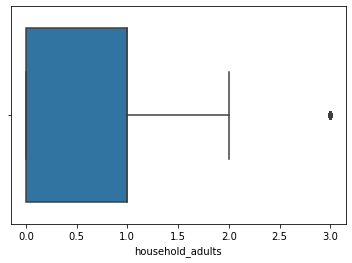

In [27]:
# Visualising the outliers
sns.boxplot(features.household_adults)

<AxesSubplot:xlabel='household_children'>

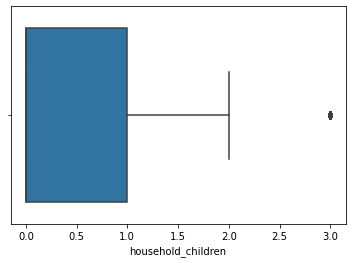

In [28]:
sns.boxplot(features.household_children)

#### There are outliers in the dataset but we are not removing them as some algorithms are not sensitive to outliers

# Visualising numerical data

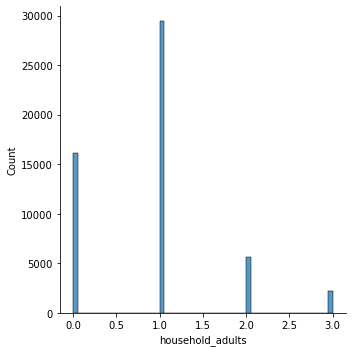

In [29]:
sns.displot(features.household_adults)

#### Number of other adults in household is mostly 1.

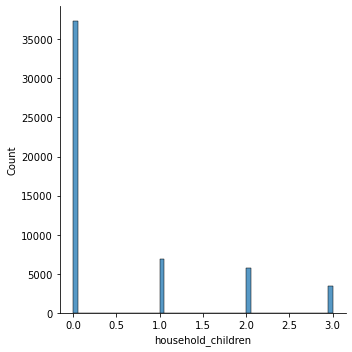

In [30]:
sns.displot(features.household_children)

#### Number of children in household is mostly 0.

## Visualising categorical data

In [31]:
features.h1n1_concern.value_counts()

2.0    21334
1.0    16306
3.0     9182
0.0     6592
Name: h1n1_concern, dtype: int64

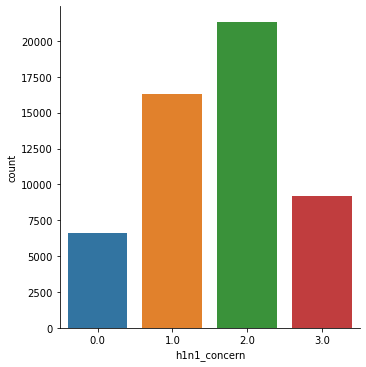

In [32]:
sns.factorplot('h1n1_concern', data = features, kind = "count")

#### Most of the people are somewhat concerned about h1n1 vaccine.

In [33]:
features.h1n1_knowledge.value_counts()

1.0    29428
2.0    18974
0.0     5012
Name: h1n1_knowledge, dtype: int64

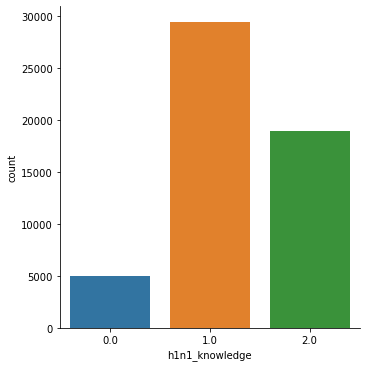

In [34]:
sns.factorplot('h1n1_knowledge', data = features, kind = "count")

#### Almost 90% of people have little or lots of knowledge about h1n1 vaccine.

In [35]:
features.behavioral_antiviral_meds.value_counts()

0.0    50812
1.0     2602
Name: behavioral_antiviral_meds, dtype: int64

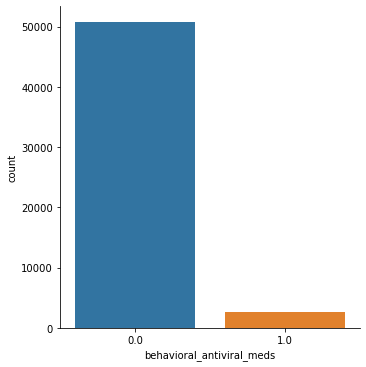

In [36]:
sns.factorplot('behavioral_antiviral_meds', data = features, kind = "count")

#### Almost non of the people took antiviral medications.

In [37]:
features.behavioral_avoidance.value_counts()

1.0    38872
0.0    14542
Name: behavioral_avoidance, dtype: int64

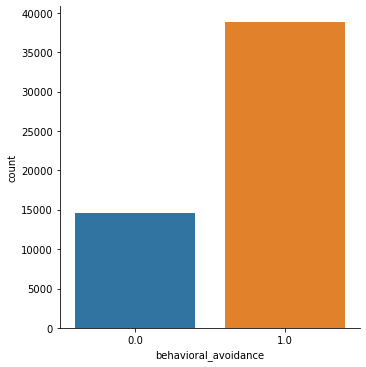

In [38]:
sns.factorplot('behavioral_avoidance', data = features, kind = "count")

#### 70% of people have avoided contact with people with symptoms.

In [39]:
features.behavioral_face_mask.value_counts()

0.0    49732
1.0     3682
Name: behavioral_face_mask, dtype: int64

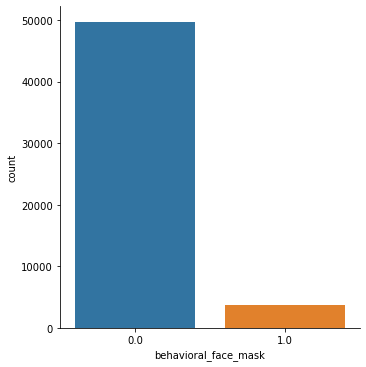

In [40]:
sns.factorplot('behavioral_face_mask', data = features, kind = "count")

#### Very few people have bought a face mask.

In [41]:
features.behavioral_wash_hands.value_counts()

1.0    44114
0.0     9300
Name: behavioral_wash_hands, dtype: int64

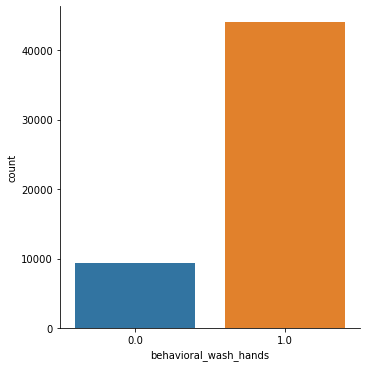

In [42]:
sns.factorplot('behavioral_wash_hands', data = features, kind = "count")

#### 80% of people have frequently washed their hands.

In [43]:
features.behavioral_large_gatherings.value_counts()

0.0    34320
1.0    19094
Name: behavioral_large_gatherings, dtype: int64

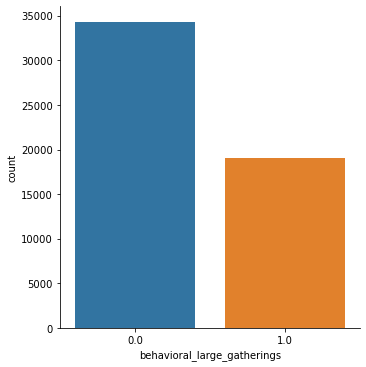

In [44]:
sns.factorplot('behavioral_large_gatherings', data = features, kind = "count")

#### Few people have reduced time at large gatherings.

In [45]:
features.behavioral_outside_home.value_counts()

0.0    35452
1.0    17962
Name: behavioral_outside_home, dtype: int64

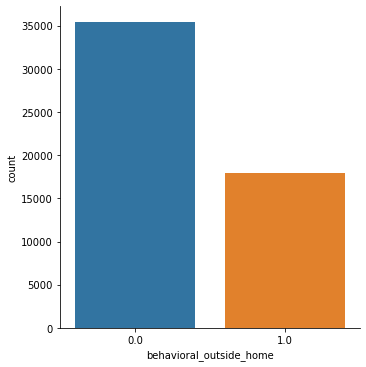

In [46]:
sns.factorplot('behavioral_outside_home', data = features, kind = "count")

#### Only few people have reduced contact with people outside their household.

In [47]:
features.behavioral_touch_face.value_counts()

1.0    36258
0.0    17156
Name: behavioral_touch_face, dtype: int64

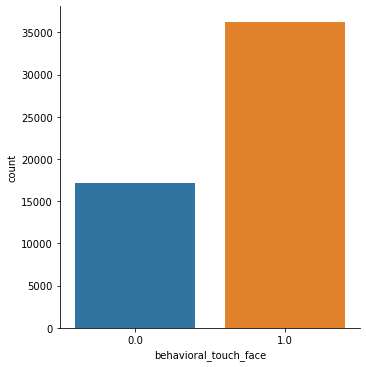

In [48]:
sns.factorplot('behavioral_touch_face', data = features, kind = "count")

#### 70% of people have avoided touching eyes, nose, or mouth.

In [49]:
features.doctor_recc_h1n1.value_counts()

0.0    42598
1.0    10816
Name: doctor_recc_h1n1, dtype: int64

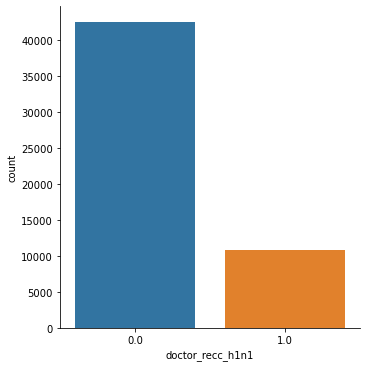

In [50]:
sns.factorplot('doctor_recc_h1n1', data = features, kind = "count")

#### Doctors recommended the h1n1 vaccine to only 20% of people.

In [51]:
features.doctor_recc_seasonal.value_counts()

0.0    37226
1.0    16188
Name: doctor_recc_seasonal, dtype: int64

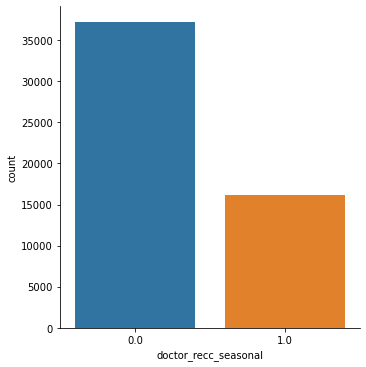

In [52]:
sns.factorplot('doctor_recc_seasonal', data = features, kind = "count")

#### Doctors recommended seasonal vaccine to only 30% of people.

In [53]:
features.chronic_med_condition .value_counts()

0.0    38834
1.0    14580
Name: chronic_med_condition, dtype: int64

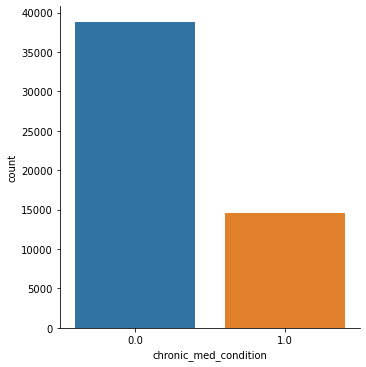

In [54]:
sns.factorplot('chronic_med_condition', data = features, kind = "count")

#### Only less than 30% of people have chronic medical conditions.

In [55]:
features.child_under_6_months.value_counts()

0.0    49138
1.0     4276
Name: child_under_6_months, dtype: int64

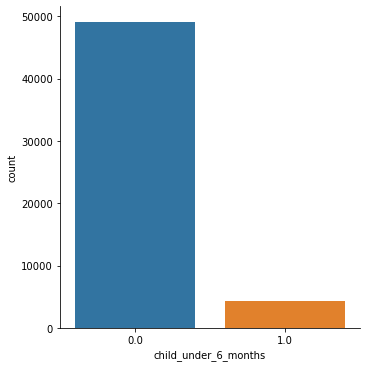

In [56]:
sns.factorplot('child_under_6_months', data = features, kind = "count")

#### Very few people had close contact with child under 6 months.

In [57]:
features.health_worker.value_counts()

0.0    47616
1.0     5798
Name: health_worker, dtype: int64

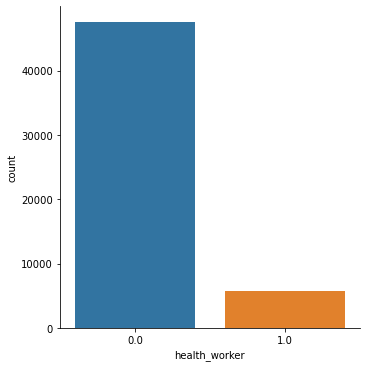

In [58]:
sns.factorplot('health_worker', data = features, kind = "count")

#### Very few people work in healthcare.

In [59]:
features.health_insurance.value_counts()

1.0    49942
0.0     3472
Name: health_insurance, dtype: int64

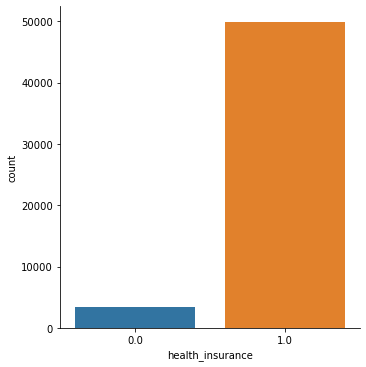

In [60]:
sns.factorplot('health_insurance', data = features, kind = "count")

#### Almost everyone has health insurance.

In [61]:
features.opinion_h1n1_vacc_effective.value_counts()

4.0    24148
5.0    14332
3.0     9446
2.0     3716
1.0     1772
Name: opinion_h1n1_vacc_effective, dtype: int64

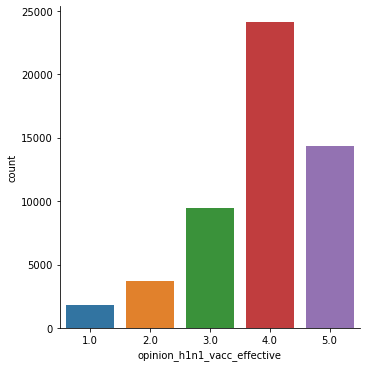

In [62]:
sns.factorplot('opinion_h1n1_vacc_effective', data = features, kind = "count")

#### Most of the people think h1n1 is somewhat effective.

In [63]:
features.opinion_h1n1_risk.value_counts()

2.0    20614
1.0    16278
4.0    10788
5.0     3500
3.0     2234
Name: opinion_h1n1_risk, dtype: int64

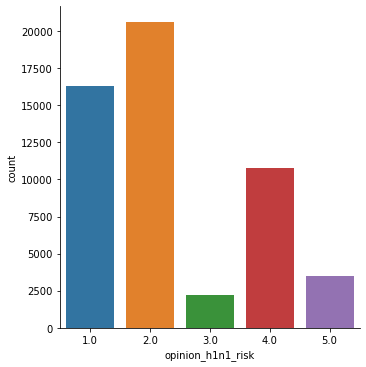

In [64]:
sns.factorplot('opinion_h1n1_risk', data = features, kind = "count")

#### Most people believe the h1n1 vaccine has somewhat low or very low risk.

In [65]:
features.opinion_h1n1_sick_from_vacc.value_counts()

2.0    19048
1.0    17996
4.0    11700
5.0     4374
3.0      296
Name: opinion_h1n1_sick_from_vacc, dtype: int64

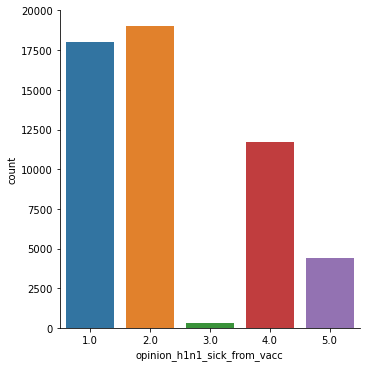

In [66]:
sns.factorplot('opinion_h1n1_sick_from_vacc', data = features, kind = "count")

#### Most people are not at all worried or not very worried of getting sick from h1n1 vaccine.

In [67]:
features.opinion_seas_vacc_effective.value_counts()

4.0    24182
5.0    19946
2.0     4412
1.0     2442
3.0     2432
Name: opinion_seas_vacc_effective, dtype: int64

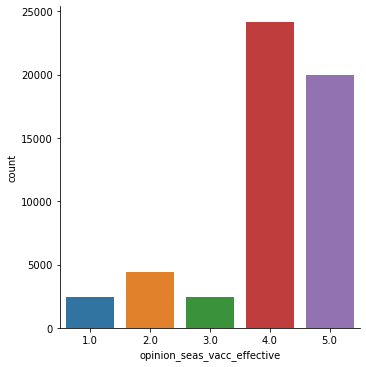

In [68]:
sns.factorplot('opinion_seas_vacc_effective', data = features, kind = "count")

#### Most people think seasonal vaccine is somewhat or very effective.

In [69]:
features.opinion_seas_risk.value_counts()

2.0    17908
4.0    15260
1.0    11948
5.0     5916
3.0     2382
Name: opinion_seas_risk, dtype: int64

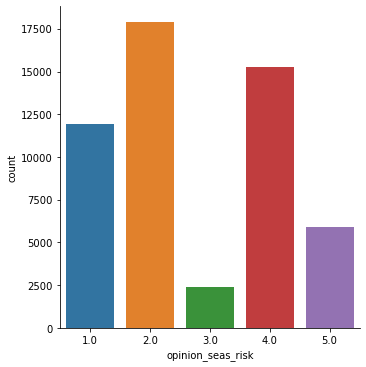

In [70]:
sns.factorplot('opinion_seas_risk', data = features, kind = "count")

#### Majority of people think the riske of seasonal vaccine are somewhat low.

In [71]:
features.opinion_seas_sick_from_vacc.value_counts()

1.0    23740
2.0    16340
4.0     9704
5.0     3442
3.0      188
Name: opinion_seas_sick_from_vacc, dtype: int64

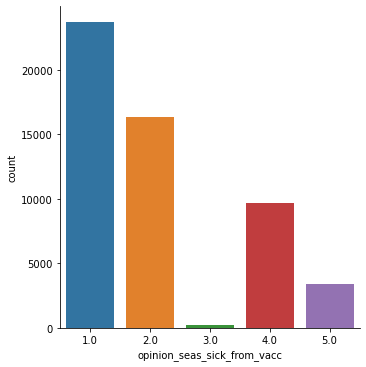

In [72]:
sns.factorplot('opinion_seas_sick_from_vacc', data = features, kind = "count")

#### Majority of people are not at all worried of getting sick from seasonal vaccine.

## Visualising labels

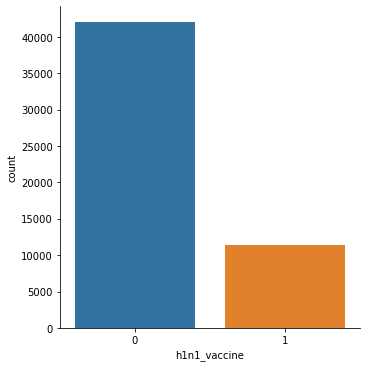

In [73]:
sns.factorplot('h1n1_vaccine', data = labels, kind = "count")

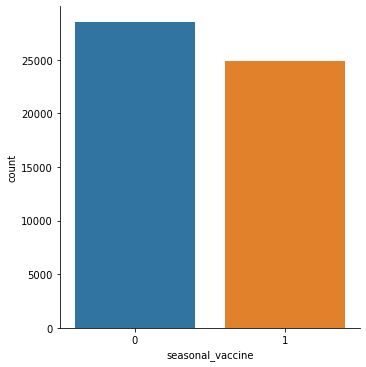

In [74]:
sns.factorplot('seasonal_vaccine', data = labels, kind = "count")

# FEATURE SCALING

## Using Min Max scaler

In [75]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [76]:
features = pd.DataFrame(features)
col_name = ['respondent_id','h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation']
features.columns = col_name

# FEATURE SELECTION

## Removing the respondent_id column as it is not important

In [77]:
features.drop(["respondent_id"], axis = 1, inplace = True)
labels.drop(["respondent_id"], axis = 1, inplace = True)

In [78]:
features.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [79]:
labels.columns

Index(['h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

## Independent and target variables

In [80]:
X = features
y = labels

## Applying SelectKBest class

In [81]:
bestfeatures = SelectKBest(score_func=chi2, k=30)

In [82]:
fit = bestfeatures.fit(X,y)

In [83]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

print(featureScores.nlargest(25,'Score'))

                          Specs        Score
9              doctor_recc_h1n1  6107.601244
10         doctor_recc_seasonal  3993.913647
19            opinion_seas_risk  1911.055533
16            opinion_h1n1_risk  1721.710966
13                health_worker  1469.366160
11        chronic_med_condition   868.292434
21                    age_group   550.883546
18  opinion_seas_vacc_effective   479.888028
15  opinion_h1n1_vacc_effective   366.888953
34        employment_occupation   267.708808
4          behavioral_face_mask   260.677848
0                  h1n1_concern   221.557338
33          employment_industry   213.514548
32           household_children   203.346636
8         behavioral_touch_face   199.687634
12         child_under_6_months   176.956885
1                h1n1_knowledge   149.857673
24                          sex   111.399903
5         behavioral_wash_hands   103.352160
26               marital_status    92.230246
17  opinion_h1n1_sick_from_vacc    86.773978
6   behavi

In [84]:
features_kbest = features.iloc[:,[9,10,19,16,13,11,21,18,15,34,0,33,32,8,12,1,24,5,26,17,6,3,7,2,4]]

## Feature importance using ExtraTrees Classifier

[0.03243255 0.02727172 0.00816932 0.01748672 0.00981504 0.0126209
 0.0190534  0.01913659 0.01776492 0.05638396 0.05860422 0.01833057
 0.01072466 0.01829437 0.0078401  0.04168631 0.04574658 0.03228921
 0.05844537 0.07116743 0.03199996 0.04957364 0.031507   0.02034825
 0.02155608 0.02899709 0.02060845 0.02045035 0.0168499  0.04125917
 0.03153849 0.02683705 0.0223437  0.02591502 0.02695194]


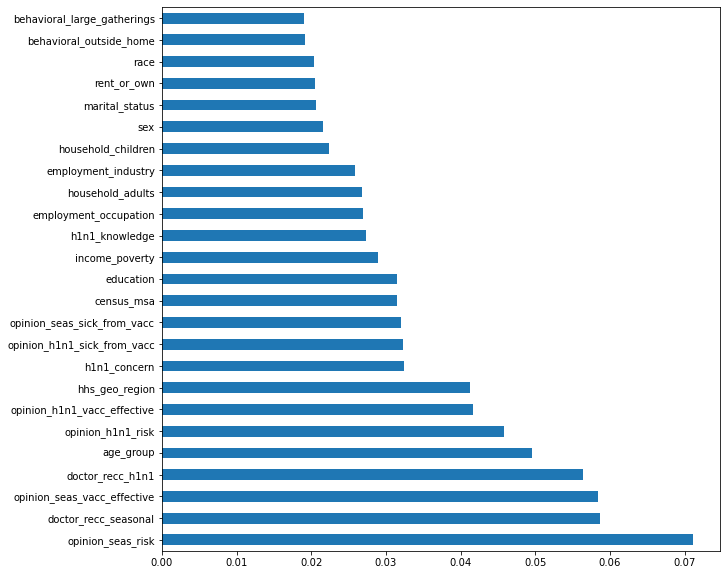

In [85]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
plt.figure(figsize=(10,10))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [86]:
features_tree = features.loc[:,['opinion_seas_risk','doctor_recc_seasonal','opinion_seas_vacc_effective',
                                 'doctor_recc_h1n1','age_group','opinion_h1n1_risk','hhs_geo_region',
                                 'opinion_h1n1_vacc_effective','h1n1_concern','opinion_seas_sick_from_vacc',
                                 'opinion_h1n1_sick_from_vacc','census_msa','education','income_poverty',
                                 'h1n1_knowledge','household_adults','employment_occupation',
                                 'employment_industry','household_children','sex','race','marital_status',
                                 'rent_or_own','behavioral_outside_home','behavioral_large_gatherings']]

## Correlation Matrix using Heatmap

In [87]:
features.corrwith(labels.h1n1_vaccine)

h1n1_concern                   0.121574
h1n1_knowledge                 0.117771
behavioral_antiviral_meds      0.040226
behavioral_avoidance           0.046837
behavioral_face_mask           0.070413
behavioral_wash_hands          0.074570
behavioral_large_gatherings    0.018089
behavioral_outside_home        0.022080
behavioral_touch_face          0.070855
doctor_recc_h1n1               0.394086
doctor_recc_seasonal           0.218976
chronic_med_condition          0.094360
child_under_6_months           0.066712
health_worker                  0.168056
health_insurance               0.041891
opinion_h1n1_vacc_effective    0.267352
opinion_h1n1_risk              0.320580
opinion_h1n1_sick_from_vacc    0.074580
opinion_seas_vacc_effective    0.177799
opinion_seas_risk              0.255955
opinion_seas_sick_from_vacc    0.008415
age_group                      0.041074
education                      0.020766
race                           0.041061
sex                           -0.020672


In [88]:
features.corrwith(labels.seasonal_vaccine)

h1n1_concern                   0.154488
h1n1_knowledge                 0.119779
behavioral_antiviral_meds      0.006013
behavioral_avoidance           0.076130
behavioral_face_mask           0.050020
behavioral_wash_hands          0.112254
behavioral_large_gatherings    0.063722
behavioral_outside_home        0.053287
behavioral_touch_face          0.119925
doctor_recc_h1n1               0.198560
doctor_recc_seasonal           0.360696
chronic_med_condition          0.169465
child_under_6_months           0.013424
health_worker                  0.126977
health_insurance               0.124929
opinion_h1n1_vacc_effective    0.203187
opinion_h1n1_risk              0.215650
opinion_h1n1_sick_from_vacc    0.027964
opinion_seas_vacc_effective    0.358869
opinion_seas_risk              0.385668
opinion_seas_sick_from_vacc   -0.060538
age_group                      0.277454
education                      0.002553
race                           0.101743
sex                           -0.077091


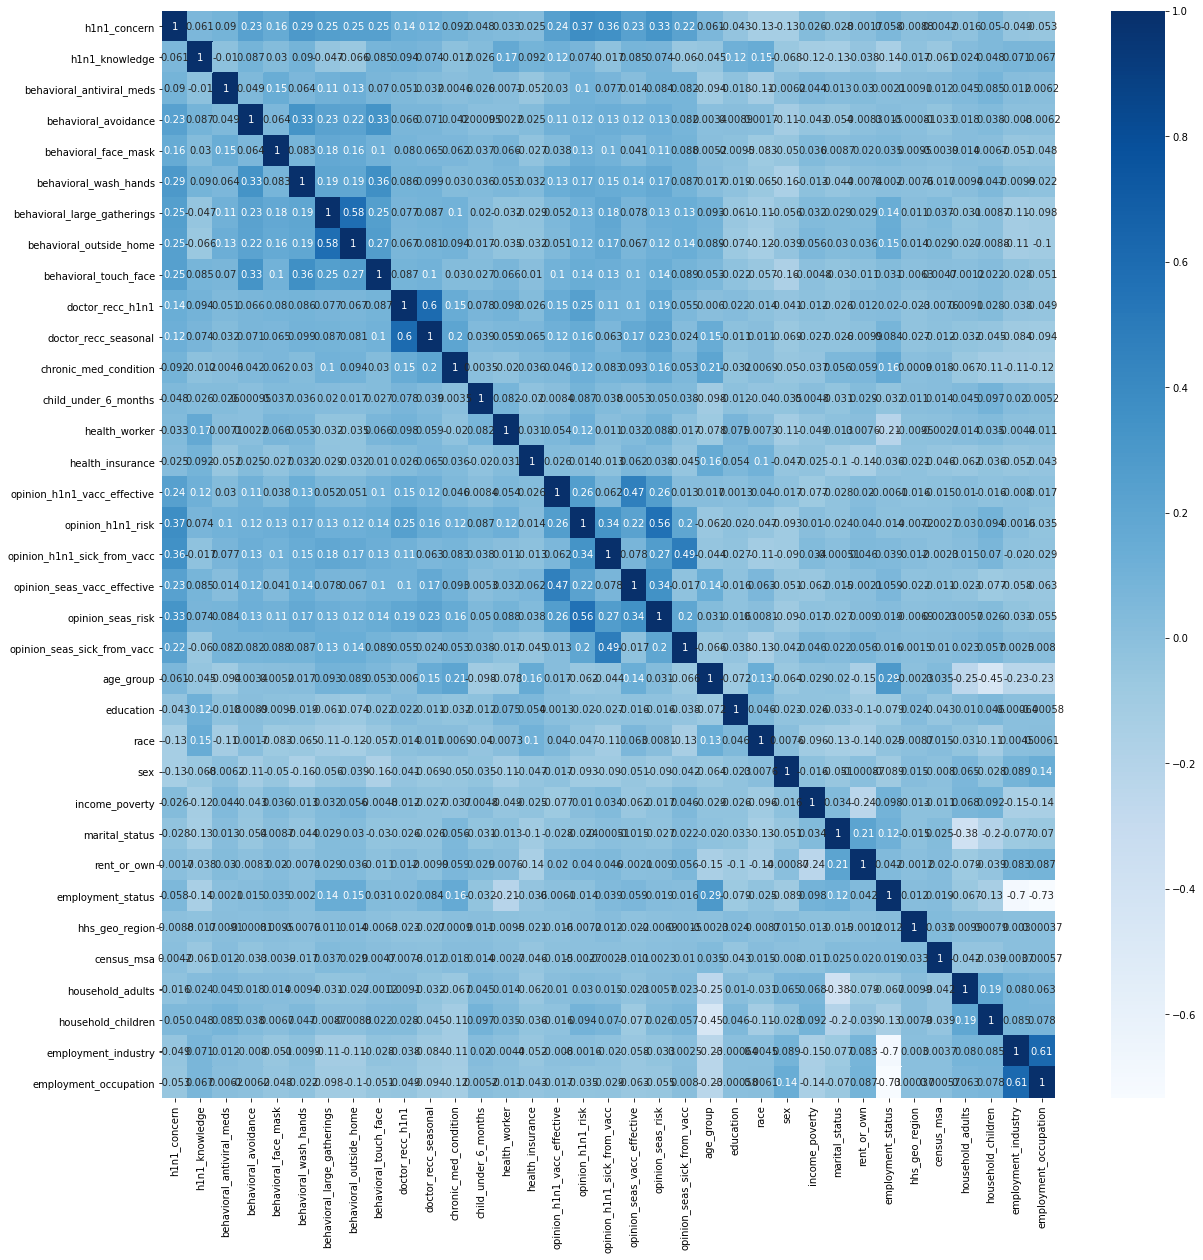

In [89]:
#get correlations of each features in dataset
corrmat = features.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(features[top_corr_features].corr(),annot=True,cmap="Blues")

In [90]:
features.drop(['opinion_seas_sick_from_vacc','hhs_geo_region','census_msa',
               'household_adults','household_children','behavioral_antiviral_meds',
               'education'], axis = 1, inplace = True)

# MODEL

## Defining independent and dependent variables

In [91]:
X = features
y = labels

In [92]:
X

,h1n1_concern,h1n1_knowledge,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,...,opinion_seas_risk,age_group,race,sex,income_poverty,marital_status,rent_or_own,employment_status,employment_industry,employment_occupation
0,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.00,0.75,1.000000,0.0,0.666667,1.0,0.5,0.666667,0.000000,0.000000
1,1.000000,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.25,0.25,1.000000,1.0,0.666667,1.0,1.0,0.000000,0.619048,0.869565
2,0.333333,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,1.000000,1.0,0.000000,1.0,0.5,0.000000,0.714286,0.956522
3,0.333333,0.5,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.75,1.00,1.000000,0.0,0.666667,1.0,1.0,0.666667,0.000000,0.000000
4,0.666667,0.5,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.00,0.50,1.000000,0.0,0.000000,0.0,0.5,0.000000,0.904762,0.260870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53409,0.666667,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.25,1.00,1.000000,0.0,0.000000,1.0,0.5,0.666667,0.000000,0.000000
53410,0.333333,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.00,0.00,1.000000,1.0,0.000000,1.0,1.0,0.000000,0.238095,0.130435
53411,0.666667,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.75,0.75,1.000000,0.0,1.000000,1.0,0.5,0.333333,0.000000,0.000000
53412,0.333333,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.00,0.00,0.333333,0.0,0.000000,0.0,1.0,0.000000,0.238095,0.304348


In [93]:
y

,h1n1_vaccine,seasonal_vaccine
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
53409,0,0
53410,0,0
53411,0,1
53412,0,0


## Splitting the data into training and testing data

In [94]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=23)

## Using Binary Relevance - Naive Bayes

In [95]:
# Gaussian Naive Bayes

# Initializing

model_BR_GNB = BinaryRelevance(GaussianNB())

# Training

model_BR_GNB.fit(x_train,y_train)

# Predicting

y_pred_BR_GNB = model_BR_GNB.predict(x_test)

# Testing

BR_GNB = accuracy_score(y_test,y_pred_BR_GNB)
BR_GNB

0.5984399375975039

## Using Binary Relevance - Decision Tree

In [96]:
# Initializing

model_BR_DT = BinaryRelevance(DecisionTreeClassifier())

# Training

model_BR_DT.fit(x_train,y_train)

# Predicting

y_pred_BR_DT = model_BR_DT.predict(x_test)

# Testing

BR_DT = accuracy_score(y_test,y_pred_BR_DT)
BR_DT

0.852792511700468

## Using Binary Relevance - Logistic Regression

In [97]:
# Initializing

model_BR_LR = BinaryRelevance(LogisticRegression())

# Training

model_BR_LR.fit(x_train,y_train)

# Predicting

y_pred_BR_LR = model_BR_LR.predict(x_test)

# Testing

BR_LR = accuracy_score(y_test,y_pred_BR_LR)
BR_LR

0.6662714508580343

## Using Classifier Chains - Naive Bayes

In [98]:
# Gaussian Naive Bayes

# Initializing

model_CC_GNB = ClassifierChain(GaussianNB())

# Training

model_CC_GNB.fit(x_train,y_train)

# Predicting

y_pred_CC_GNB = model_CC_GNB.predict(x_test)

# Testing

CC_GNB = accuracy_score(y_test,y_pred_CC_GNB)
CC_GNB

0.6016848673946957

## Using Classifier Chains - Decision Tree

In [99]:
# Initializing

model_CC_DT = ClassifierChain(DecisionTreeClassifier())

# Training

model_CC_DT.fit(x_train,y_train)

# Predicting

y_pred_CC_DT = model_CC_DT.predict(x_test)

# Testing

CC_DT = accuracy_score(y_test,y_pred_CC_DT)
CC_DT

0.8568486739469579

## Using Classifier Chains - Logistic Regression

In [100]:
# Initializing

model_CC_LR = ClassifierChain(LogisticRegression())

# Training

model_CC_LR.fit(x_train,y_train)

# Predicting

y_pred_CC_LR = model_CC_LR.predict(x_test)

# Testing

CC_LR = accuracy_score(y_test,y_pred_CC_LR)
CC_LR

0.6697035881435257

## Using Label Powerset - Naive Bayes

In [101]:
# Gaussian Naive Bayes

# Initializing

model_LP_GNB = LabelPowerset(GaussianNB())

# Training

model_LP_GNB.fit(x_train,y_train)

# Predicting

y_pred_LP_GNB = model_LP_GNB.predict(x_test)

# Testing

LP_GNB = accuracy_score(y_test,y_pred_LP_GNB)
LP_GNB

0.6053042121684867

## Using Label Powerset - Decision Tree

In [102]:
# Initializing

model_LP_DT = LabelPowerset(DecisionTreeClassifier())

# Training

model_LP_DT.fit(x_train,y_train)

# Predicting

y_pred_LP_DT = model_LP_DT.predict(x_test)

# Testing

LP_DT = accuracy_score(y_test,y_pred_LP_DT)
LP_DT

0.8607176287051482

## Using Label Powerset - Logistic Regression

In [103]:
# Initializing

model_LP_LR = LabelPowerset(LogisticRegression())

# Training

model_LP_LR.fit(x_train,y_train)

# Predicting

y_pred_LP_LR = model_LP_LR.predict(x_test)

# Testing

LP_LR = accuracy_score(y_test,y_pred_LP_LR)
LP_LR

0.6781279251170047

## Random Forest

In [104]:
# Initializing

model_RF = RandomForestClassifier()

# Training

model_RF.fit(x_train,y_train)

# Predicting

y_pred_RF = model_RF.predict(x_test)

# Testing
RF = accuracy_score(y_test,y_pred_RF)
RF

0.8960998439937597

# MODEL EVALUATION

## Accuracy score comparison chart

In [105]:
Accuracy_Score = [BR_GNB,BR_DT,BR_LR,CC_GNB,CC_DT,CC_LR,LP_GNB,LP_DT,LP_LR,RF]
Models = ['BR Naive Bayes', 'BR Decision Tree' , 'BR Logistic Regression', 'CC Naive Bayes',
          'CC Decision Tree', 'CC Logistic Regression', 'LP Naive Bayes', 'LP Decision Tree',
          'LP Logistic Regression', 'Random Forest']

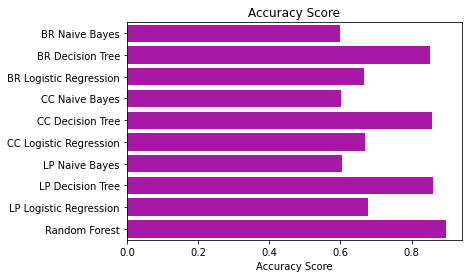

In [106]:
sns.barplot(Accuracy_Score, Models, color="m")
plt.xlabel('Accuracy Score')
plt.title('Accuracy Score')
plt.show()

#### Both Random forest and LP decision tree seem to have good accuracy score.

## K-Fold cross-validation

In [107]:
# Label Powerset - Decision Tree

scores =cross_val_score(model_LP_DT,X,y,cv=5)
scores

array([0.99812787, 0.99840869, 0.99831508, 0.99831508, 0.99840854])

In [108]:
scores.mean()

0.9983150502394033

In [109]:
scores.std() # Standard Deviation is less than 0.05

0.0001025137790463149

In [110]:
# Random Forest

scores =cross_val_score(model_RF,X,y,cv=5)
scores

array([0.99784705, 0.99831508, 0.99794065, 0.99831508, 0.99822131])

In [111]:
scores.mean()

0.9981278334046031

In [112]:
scores.std() # Standard Deviation is less than 0.05

0.00019633513230543422

#### Label Powerset - Decision Tree has better mean scores compared to Random forest

# HYPERPARAMETER TUNING

## Using grid search

In [113]:
model_LP_DT.get_params().keys()

dict_keys(['classifier', 'classifier__ccp_alpha', 'classifier__class_weight', 'classifier__criterion', 'classifier__max_depth', 'classifier__max_features', 'classifier__max_leaf_nodes', 'classifier__min_impurity_decrease', 'classifier__min_impurity_split', 'classifier__min_samples_leaf', 'classifier__min_samples_split', 'classifier__min_weight_fraction_leaf', 'classifier__random_state', 'classifier__splitter', 'require_dense'])

In [114]:
parameters = {'classifier__max_depth':[10,30,50,70,90,110,150,200],
              'classifier__random_state': [0,1,10,14,20,27,23],
              'classifier__max_features':['int','float','auto','sqrt','log2','None']}

grid = GridSearchCV(model_LP_DT,parameters,cv=5,verbose=1)
grid.fit(X,y)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits


GridSearchCV(cv=5,
             estimator=LabelPowerset(classifier=DecisionTreeClassifier(),
                                     require_dense=[True, True]),
             param_grid={'classifier__max_depth': [10, 30, 50, 70, 90, 110, 150,
                                                   200],
                         'classifier__max_features': ['int', 'float', 'auto',
                                                      'sqrt', 'log2', 'None'],
                         'classifier__random_state': [0, 1, 10, 14, 20, 27,
                                                      23]},
             verbose=1)

In [115]:
grid.best_score_

0.9983150502394033

In [116]:
grid.best_params_

{'classifier__max_depth': 50,
 'classifier__max_features': 'auto',
 'classifier__random_state': 0}

## After tuning

In [117]:
# Initializing

model_LP_DT = LabelPowerset(DecisionTreeClassifier(max_depth=50,max_features="auto",random_state=0))

# Training

model_LP_DT.fit(x_train,y_train)

# Predicting

y_pred_LP_DT = model_LP_DT.predict(x_test)

# Testing

LP_DT = accuracy_score(y_test,y_pred_LP_DT)
LP_DT

0.8633385335413416

In [118]:
print(classification_report(y_test,y_pred_LP_DT))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      3425
           1       0.90      0.90      0.90      7591

   micro avg       0.88      0.87      0.88     11016
   macro avg       0.87      0.86      0.86     11016
weighted avg       0.88      0.87      0.88     11016
 samples avg       0.45      0.45      0.44     11016



In [119]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred_RF)

0.9145888923848835